In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import mesa
from rock_scissors_paper.model_MV import RockScissorsPaperMV
from rock_scissors_paper.model_SSR import RockScissorsPaperSSR

In [2]:
model_params_MV = {
    "height": 100,
    "width": 100,
    "hex": True,
    "n_species": 3,
    "prob0": 1/3,
    "prob1": 1/3,
    "prob2": 1/3,
    "prob3": 0,
    "prob4": 0,
    "color_map": [{
        0: 'red',
        1: 'yellow',
        2: 'purple',
        3: 'green',
        4: 'blue'
    }]
}
results = mesa.batch_run(
    RockScissorsPaperMV,
    parameters=model_params_MV,
    iterations=1, # per ogni comb di parametri, quante volte fare run
    max_steps=200,
    number_processes=1,
    data_collection_period=1,  # 1, altrimenti il datacollector raccolie i dati solo all'ultimo step
    display_progress=True,
)

results_df= pd.DataFrame(results)
results_df.rename(columns={0: "rock", 1: "scissors", 2: "paper"}, inplace=True)
results_df

  0%|          | 0/5 [00:00<?, ?it/s]

/Users/irenetesta/anaconda3/envs/cmcs/lib/python3.11/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


,RunId,iteration,Step,height,width,hex,n_species,prob0,prob1,prob2,prob3,prob4,color_map,rock,scissors,paper
0,0,0,0,100,100,True,3,0.333333,0.333333,0.333333,0,0,0,3363,3287,3350
1,0,0,1,100,100,True,3,0.333333,0.333333,0.333333,0,0,0,3324,3314,3362
2,0,0,2,100,100,True,3,0.333333,0.333333,0.333333,0,0,0,3355,3283,3362
3,0,0,3,100,100,True,3,0.333333,0.333333,0.333333,0,0,0,3382,3270,3348
4,0,0,4,100,100,True,3,0.333333,0.333333,0.333333,0,0,0,3361,3281,3358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,4,0,196,100,100,True,3,0.333333,0.333333,0.333333,0,0,4,3288,3475,3237
1001,4,0,197,100,100,True,3,0.333333,0.333333,0.333333,0,0,4,3321,3473,3206
1002,4,0,198,100,100,True,3,0.333333,0.333333,0.333333,0,0,4,3344,3421,3235
1003,4,0,199,100,100,True,3,0.333333,0.333333,0.333333,0,0,4,3404,3318,3278


<Axes: >

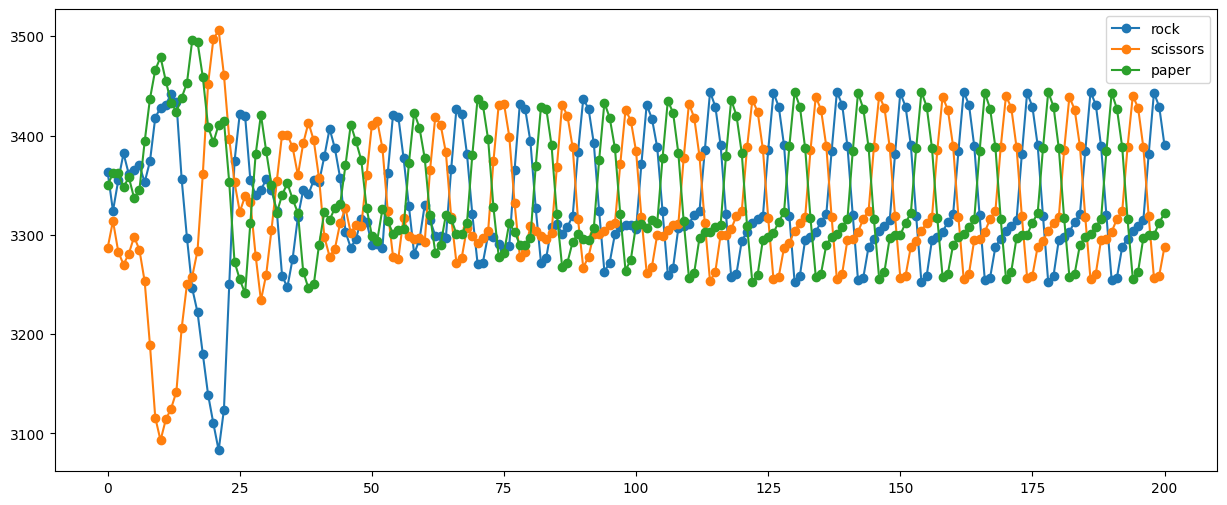

In [3]:
_, axs = plt.subplots(1, figsize=(15, 6))
results_df[["rock", "scissors", "paper"]].plot(ax=axs, style='-o')

In [4]:
fig = px.scatter_ternary(
    results_df,
    a="paper",
    b="rock",
    c="scissors",
    color=results_df.index,
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))

In [19]:
model_params_SSR = {
    "height": 100,
    "width": 100,
    "hex": True,
    "n_species": 3,
    "prob0": 0.25,
    "prob1": 0.25,
    "prob2": 0.25,
    "prob3": 0.25,
    "prob4": 0,
    "prob5": 0,
    "color_map": {
        0: 'red',
        1: 'yellow',
        2: 'purple',
        3: 'green',
        4: 'blue'
    }
}
results = mesa.batch_run(
    RockScissorsPaperSSR,
    parameters=model_params_SSR,
    iterations=1,
    max_steps=200,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

results_df= pd.DataFrame(results)
results_df.rename(columns={0: "empty", 1: "rock", 2: "scissors", 3: "paper"}, inplace=True)
results_df

  0%|          | 0/5 [00:00<?, ?it/s]

,RunId,iteration,Step,height,width,hex,n_species,prob0,prob1,prob2,prob3,prob4,prob5,color_map,empty,rock,scissors,paper
0,0,0,0,100,100,True,3,0.25,0.25,0.25,0.25,0,0,0,2413,2531,2577,2479
1,0,0,1,100,100,True,3,0.25,0.25,0.25,0.25,0,0,0,2444,2520,2588,2448
2,0,0,2,100,100,True,3,0.25,0.25,0.25,0.25,0,0,0,2373,2557,2609,2461
3,0,0,3,100,100,True,3,0.25,0.25,0.25,0.25,0,0,0,2257,2648,2610,2485
4,0,0,4,100,100,True,3,0.25,0.25,0.25,0.25,0,0,0,2214,2633,2605,2548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,4,0,196,100,100,True,3,0.25,0.25,0.25,0.25,0,0,4,966,2844,3289,2901
1001,4,0,197,100,100,True,3,0.25,0.25,0.25,0.25,0,0,4,959,2853,3257,2931
1002,4,0,198,100,100,True,3,0.25,0.25,0.25,0.25,0,0,4,932,2868,3242,2958
1003,4,0,199,100,100,True,3,0.25,0.25,0.25,0.25,0,0,4,931,2875,3197,2997


<Axes: >

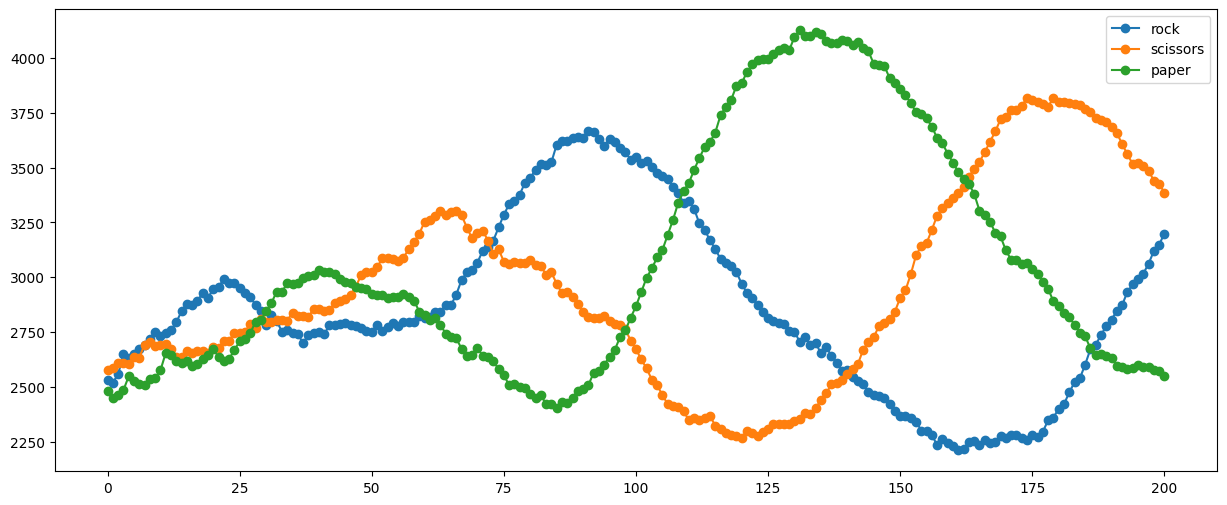

In [20]:
_, axs = plt.subplots(1, figsize=(15, 6))
results_df[["rock", "scissors", "paper"]].plot(ax=axs, style='-o')

In [21]:
fig = px.scatter_ternary(
    results_df,
    a="paper",
    b="rock",
    c="scissors",
    color=results_df.index,
    size_max=10,
    title="RSP Model"
    )
fig.update_traces(mode='lines+markers', line=dict(color='black'))
fig.update_layout(coloraxis_colorbar=dict(title='Time'))

In [ ]:
# TODO: JupiterViz
# https://github.com/projectmesa/mesa-examples/blob/main/examples/schelling_experimental/app.py
# https://github.com/projectmesa/mesa-examples/blob/main/examples/hotelling_law/app.py